In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_results_public.csv")

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [5]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]

In [6]:
df.rename(columns={'ConvertedCompYearly': 'Salary'}, inplace=True)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       58930 non-null  object 
 1   EdLevel       60784 non-null  object 
 2   YearsCodePro  51610 non-null  object 
 3   Employment    65437 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [8]:
# Since the dataset is relatively large, we can drop the missing values rather than carrying out Imputation
df = df.dropna()  
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23345 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23345 non-null  object 
 1   EdLevel       23345 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23345 non-null  object 
 4   Salary        23345 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [10]:
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Employed, part-time',


In [11]:
df['Country'].nunique()

166

In [12]:
df = df[df['Employment'].str.contains('Employed, full-time')]

In [13]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,"Employed, full-time",161044.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20302 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       20302 non-null  object 
 1   EdLevel       20302 non-null  object 
 2   YearsCodePro  20302 non-null  object 
 3   Employment    20302 non-null  object 
 4   Salary        20302 non-null  float64
dtypes: float64(1), object(4)
memory usage: 951.7+ KB


In [15]:
df['Country'].value_counts()

Country
United States of America                                4351
Germany                                                 1657
Ukraine                                                 1333
United Kingdom of Great Britain and Northern Ireland    1239
India                                                    934
                                                        ... 
Lesotho                                                    1
Burundi                                                    1
Barbados                                                   1
Mali                                                       1
Congo, Republic of the...                                  1
Name: count, Length: 160, dtype: int64

In [16]:
def cleaned_cat(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else: 
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


In [17]:
country_map = cleaned_cat(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Country
Other                                                   5943
United States of America                                4351
Germany                                                 1657
Ukraine                                                 1333
United Kingdom of Great Britain and Northern Ireland    1239
India                                                    934
France                                                   784
Canada                                                   778
Brazil                                                   601
Spain                                                    498
Italy                                                    456
Australia                                                444
Poland                                                   441
Netherlands                                              440
Sweden                                                   403
Name: count, dtype: int64

In [18]:
df['Country'].nunique()

15

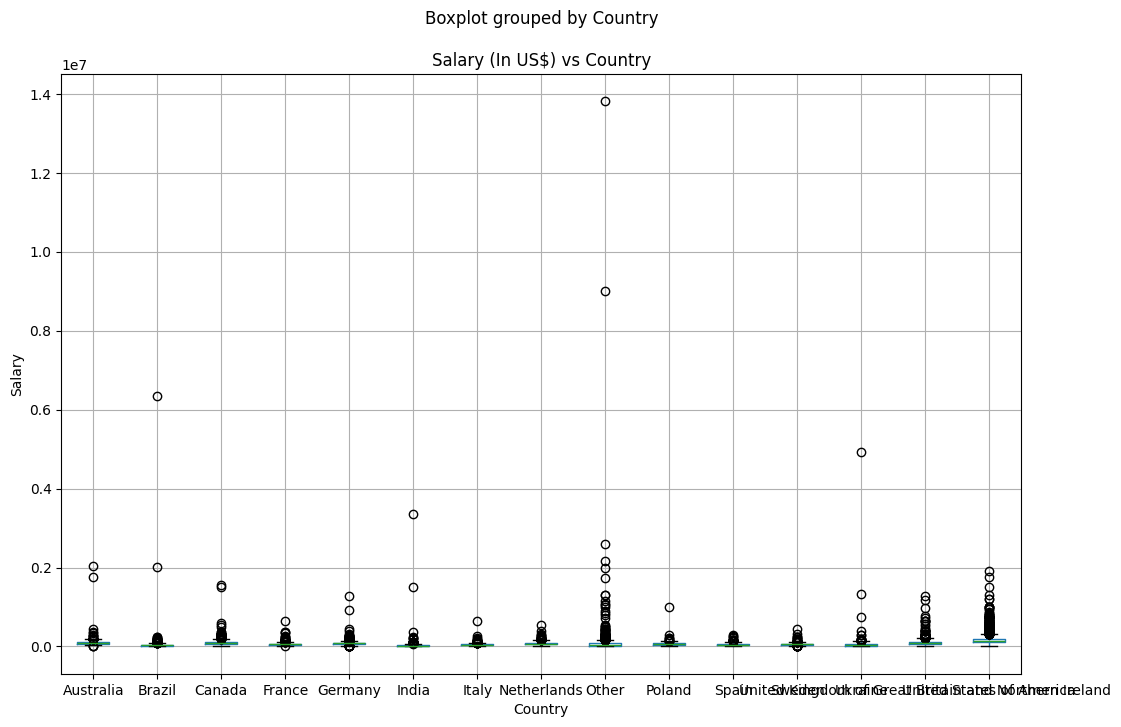

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (In US$) vs Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

In [20]:
df = df[df['Salary']<= 250000]
df = df[df['Salary']>=10000]
df = df[df['Country']!='Other']

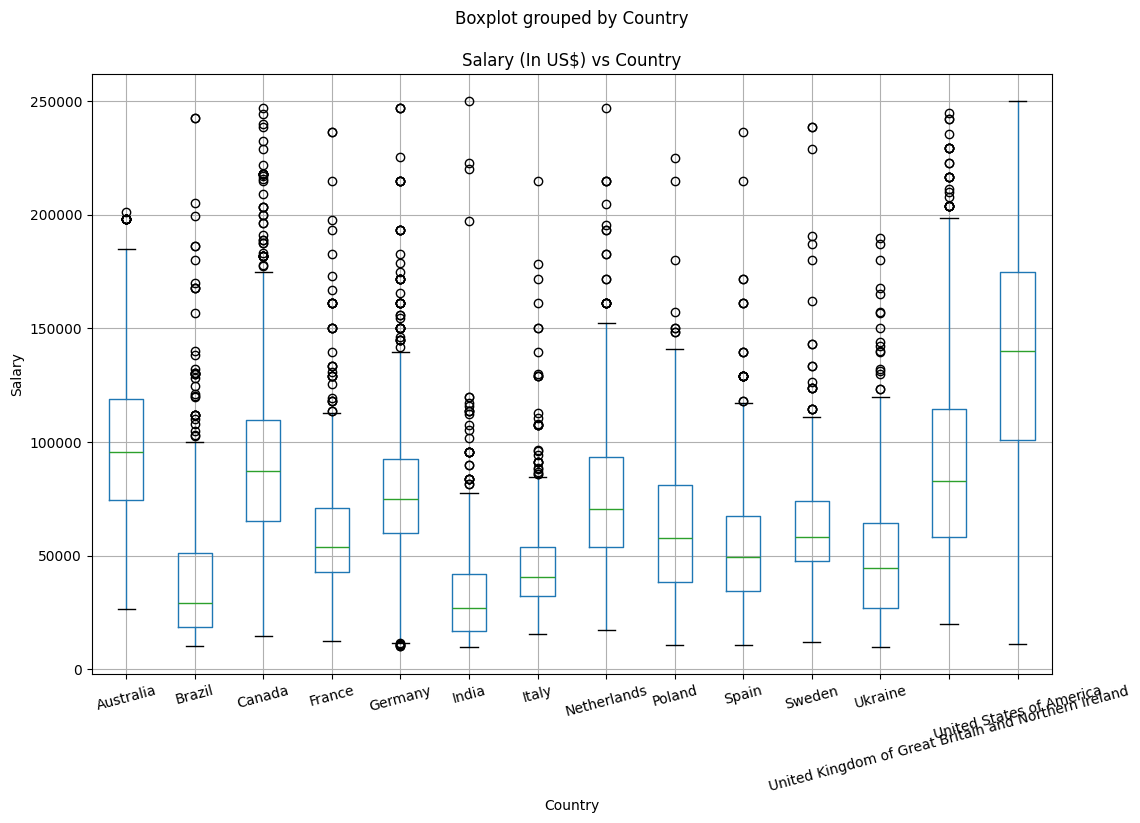

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (In US$) vs Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=15)
plt.show()

In [22]:
df['YearsCodePro'].value_counts()

YearsCodePro
3                   1012
5                    960
2                    879
4                    852
10                   847
6                    834
8                    804
7                    725
12                   539
9                    467
15                   418
1                    407
20                   367
11                   366
13                   308
14                   288
16                   260
25                   256
Less than 1 year     256
17                   235
18                   221
23                   143
30                   143
19                   142
24                   142
22                   125
26                   115
28                   106
21                   104
27                    90
35                    57
32                    53
29                    51
34                    43
40                    43
38                    38
33                    32
31                    30
36                    25
37          

In [23]:
df['YearsCodePro'].replace('Less than 1 year', 0.5, inplace=True)

C:\Users\rania\AppData\Local\Temp\ipykernel_33800\1065251996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace('Less than 1 year', 0.5, inplace=True)


In [24]:
df['YearsCodePro'].value_counts()

YearsCodePro
3      1012
5       960
2       879
4       852
10      847
6       834
8       804
7       725
12      539
9       467
15      418
1       407
20      367
11      366
13      308
14      288
16      260
25      256
0.5     256
17      235
18      221
23      143
30      143
19      142
24      142
22      125
26      115
28      106
21      104
27       90
35       57
32       53
29       51
34       43
40       43
38       38
33       32
31       30
36       25
37       24
39       18
45       17
42       12
43       10
41       10
44        6
46        4
50        3
48        2
49        1
47        1
Name: count, dtype: int64

In [25]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          5748
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       3873
Some college/university study without earning a degree                                1422
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         702
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     539
Associate degree (A.A., A.S., etc.)                                                    450
Something else                                                                         107
Primary/elementary school                                                               50
Name: count, dtype: int64

In [26]:
def clean_ed_level(ed_level):
    ed_level = ed_level.strip() 
    if "Bachelor" in ed_level:
        return "Bachelor's degree"
    elif "Master" in ed_level:
        return "Master's degree"
    elif "Professional" in ed_level:
        return "Professional degree"
    elif "Associate" in ed_level:
        return "Associate degree"
    else:
        return "Less than Bachelors"

df['EdLevel'] = df['EdLevel'].apply(clean_ed_level)


In [27]:
df['EdLevel'].value_counts()

EdLevel
Bachelor's degree      5748
Master's degree        3873
Less than Bachelors    2118
Professional degree     702
Associate degree        450
Name: count, dtype: int64

In [79]:
#Transforming the Categorical Columns using Label Encoder

from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 4, 3, 1, 0])

In [80]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12,  3,  1,  4, 11,  2,  6,  5,  9,  7, 10,  8,  0])

In [30]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
389,13,2,7,"Employed, full-time;Student, part-time",110000.0
392,12,4,18,"Employed, full-time",161044.0
395,12,3,25,"Employed, full-time",121018.0
398,13,2,30,"Employed, full-time",195000.0
409,3,4,50,"Employed, full-time",57999.0


In [31]:
x=df.drop(columns=['Salary', 'Employment'], axis=1)
x

,Country,EdLevel,YearsCodePro
389,13,2,7
392,12,4,18
395,12,3,25
398,13,2,30
409,3,4,50
...,...,...,...
41167,13,0,25
41179,11,2,6
41180,10,3,3
41184,13,3,30


In [32]:
y = df['Salary']
y

389      110000.0
392      161044.0
395      121018.0
398      195000.0
409       57999.0
           ...   
41167    100000.0
41179     15600.0
41180     44640.0
41184    170000.0
41185    116844.0
Name: Salary, Length: 12891, dtype: float64

In [57]:
# Training the model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
X_train

,Country,EdLevel,YearsCodePro
28085,1,2,4
3003,0,1,4
5084,4,3,13
11627,13,2,20
15997,2,2,15
...,...,...,...
38232,12,1,2
16950,11,3,21
17601,11,2,17
3059,10,2,26


In [59]:
X_test

,Country,EdLevel,YearsCodePro
23175,4,2,6
6287,9,2,3
424,4,3,30
22448,13,1,13
23126,11,3,12
...,...,...,...
3998,12,2,8
27878,5,1,3
27621,3,3,3
32632,11,3,2


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1958462788.6452901
R^2 Score: 0.2967242721569434


In [ ]:
# The error is extremely high. Therefore, we will try another model

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

Y_pred = dt_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Decision Tree Mean Squared Error: {mse}')
print(f'Decision Tree R^2 Score: {r2}')

Decision Tree Mean Squared Error: 1261279494.3230498
Decision Tree R^2 Score: 0.5470798528691267


In [42]:
print("${:,.02f}".format(mse))

$1,261,279,494.32


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Random Forest Mean Squared Error: {mse}')
print(f'Random Forest R^2 Score: {r2}')

Random Forest Mean Squared Error: 1200586037.1475782
Random Forest R^2 Score: 0.5688746173741581


In [ ]:
df['YearsCodePro'].value_counts()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Replacing 'auto' with valid options
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, Y_train)

# Check the best parameters and performance
print(f'Best parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [49]:
print(X_train.isnull().sum())

Country         0
EdLevel         0
YearsCodePro    0
dtype: int64


In [51]:
# Use the best parameters to initialize the RandomForestRegressor
best_rf = RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    max_features=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Train the model on the training data
best_rf.fit(X_train, Y_train)

# Predict the target values for the test set
Y_pred = best_rf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Optimized Random Forest Mean Squared Error: {mse}')
print(f'Optimized Random Forest R^2 Score: {r2}')


Optimized Random Forest Mean Squared Error: 1121305600.704561
Optimized Random Forest R^2 Score: 0.5973438877460224


In [54]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.2 MB/s eta 0:01:40
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:34
   ---------------------------------------- 1.3/124.9 MB 1.3 MB/s eta 0:01:34
    --------------------------------------- 1.6/124.9 MB 1.4 MB/s eta 0:01:32
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:32
    --------------------------------------- 2.4/124.9 MB 1.5 MB/s eta 0:01:25
    --------------------------------------- 2.6/124.9 MB 1.5 MB/s eta 0:01:22
   - -------------------------------------- 3.1/124.9 MB 1.6 MB/s eta 0:01:18
   - -------------------------------------- 3.7/124.9 MB 1.7 MB/s eta 0:01:13
   - --------

In [56]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [66]:
import numpy as np
mse = 1121305600.704561 
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 33485.90152145468


In [67]:
df['Salary'].value_counts()

Salary
64444.0     194
150000.0    182
53703.0     179
200000.0    172
120000.0    163
           ... 
187203.0      1
43356.0       1
64898.0       1
155255.0      1
91171.0       1
Name: count, Length: 2302, dtype: int64

In [70]:
df['Country'].value_counts()

Country
13    3934
4     1629
12    1196
11     883
3      773
2      751
5      628
1      505
9      487
6      450
7      432
0      432
8      413
10     378
Name: count, dtype: int64

In [71]:
x = np.array([['United States of America', 'Master\'s degree', 15]])
x

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [81]:
x[:,0] = le_country.transform(x[:,0])
x[:,1] = le_education.transform(x[:,1])
x = x.astype(float)
x

array([[13.,  3., 15.]])

In [82]:
y_pred = best_rf.predict(x)
y_pred

C:\Users\rania\Desktop\IRL_Internship\backend_sessions\Salary Prediction App\.env_sal_pred\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([156563.04436118])

In [75]:
import pickle

In [76]:
data = {"model":best_rf, "le_country": label_country, "le_education": label_ed}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [77]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [78]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\rania\Desktop\IRL_Internship\backend_sessions\Salary Prediction App\.env_sal_pred\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([156563.04436118])